<a href="https://colab.research.google.com/github/Vardhaaaan/Neural-networks-and-Deep-learning-/blob/main/RGB_to_Gray_scale_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


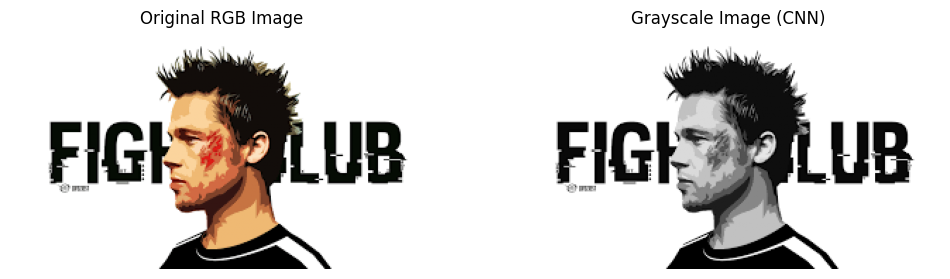

In [9]:
# =========================================
# RGB to Grayscale using CNN (Single Cell)
# For the given Fight Club image
# =========================================

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# 1️⃣ Define CNN model (1x1 convolution)
model = Sequential([
    Conv2D(
        filters=1,
        kernel_size=(1, 1),
        input_shape=(None, None, 3),
        use_bias=False
    )
])

# 2️⃣ Initialize grayscale weights
# Gray = 0.299R + 0.587G + 0.114B
# Original incorrect weights shape: (1, 3, 1, 1)
# Correct weights shape for Conv2D: (kernel_height, kernel_width, input_channels, output_channels) = (1, 1, 3, 1)
weights = np.array([[[[0.299], [0.587], [0.114]]]]) # Corrected shape (1, 1, 3, 1)
model.layers[0].set_weights([weights])

# 3️⃣ Load the provided image
img = cv2.imread("images.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img / 255.0
img = np.expand_dims(img, axis=0)

# 4️⃣ Apply CNN
gray_img = model.predict(img)

# 5️⃣ Remove batch & channel dimensions
gray_img = gray_img[0, :, :, 0]

# 6️⃣ Display original and grayscale images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Image (CNN)")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


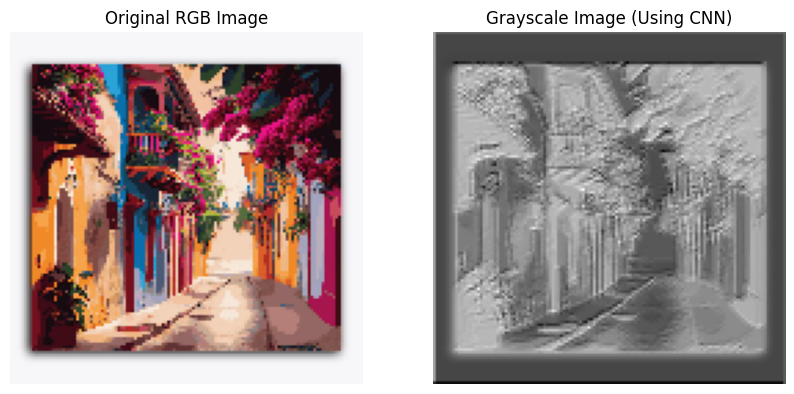

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# Load your image
img = cv2.imread("Original.png.webp") # Changed filename here

# Check if image was loaded successfully
if img is None:
    print("Error: Could not load image. Please ensure the correct filename is used and the file exists.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize for CNN
    img_rgb = cv2.resize(img_rgb, (128, 128))

    # Normalize and reshape
    img_input = img_rgb / 255.0
    img_input = np.expand_dims(img_input, axis=0)  # (1, 128, 128, 3)

    # Create a simple CNN model
    model = Sequential([
        Conv2D(1, (3, 3), padding="same", activation="linear", input_shape=(128, 128, 3))
    ])

    # Predict grayscale image
    gray_cnn = model.predict(img_input)

    # Remove extra dimensions
    gray_cnn = gray_cnn[0, :, :, 0]

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original RGB Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(gray_cnn, cmap="gray")
    plt.title("Grayscale Image (Using CNN)")
    plt.axis("off")

    plt.show()